In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


sns.set(style="whitegrid", palette="Set2")

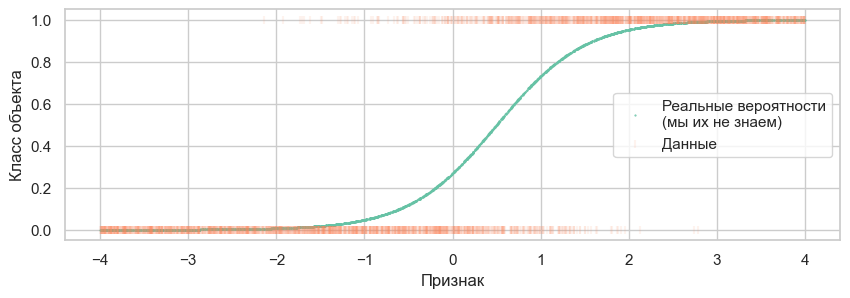

In [3]:
sample_size = 3_000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

In [4]:
from sklearn.linear_model import LogisticRegression
a = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=True, max_iter=10000)
a.fit(X, y.ravel())

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [5]:

import sklearn, sklearn.linear_model
print(sklearn.__version__)
print(sklearn.linear_model.__file__)



1.7.2
c:\Users\IvanC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\__init__.py


In [6]:
print("intercept_ (свободный член):", a.intercept_[0])
print("coef_ (коэффициент при признаке):", a.coef_[0][0])

intercept_ (свободный член): -0.9592223338433826
coef_ (коэффициент при признаке): 1.9618004240374427


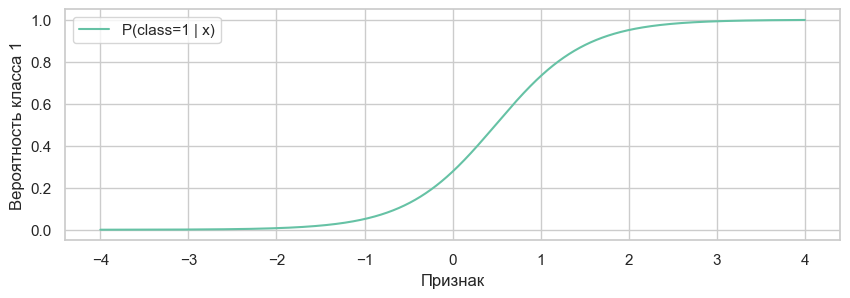

C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\2343589151.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


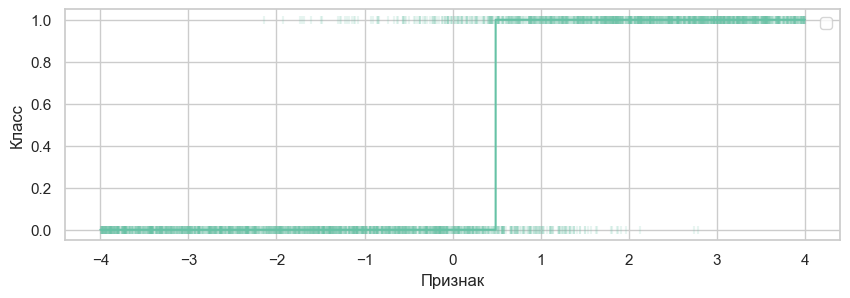

In [7]:
X_grid = np.linspace(-4, 4, 10_000).reshape((-1, 1))
a.predict(X_grid)
arr = np.array(10000,)
z = a.intercept_[0] + a.coef_[0][0] * X_grid[:, 0]
p_grid = 1.0 / (1.0 + np.exp(-z))
p_class = np.where(p_grid >= 0.5, 1, 0)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(X_grid[:, 0], p_grid, label='P(class=1 | x)')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Вероятность класса 1')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.step(X_grid[:,0], p_class)
plt.scatter(X[:,0], y, marker='|', alpha=0.15)
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Класс')
plt.legend()


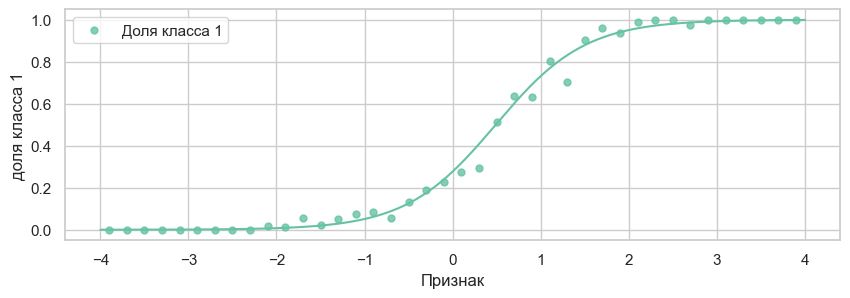

In [8]:
bins = np.array([x / 10.0 for x in range(-40, 41, 2)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(X[:, 0], bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'y': y.ravel()})
df = df.groupby('bin')['y'].agg(['mean', 'size']).reset_index()

p_em = np.full(len(cen), np.nan)
p_em[df['bin'].to_numpy()] = df['mean'].to_numpy()


plt.figure(figsize=(10, 3))
plt.plot(X_grid[:, 0], p_grid)
plt.scatter(cen, p_em, s=25, alpha=0.8, label='Доля класса 1')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend(); plt.show()

C:\Users\IvanC\AppData\Local\Temp\ipykernel_24104\2038145093.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


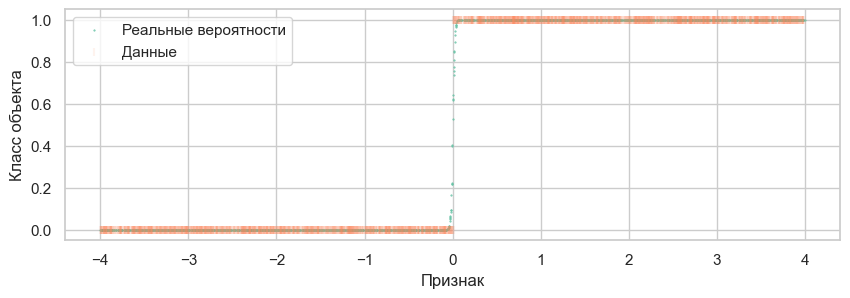

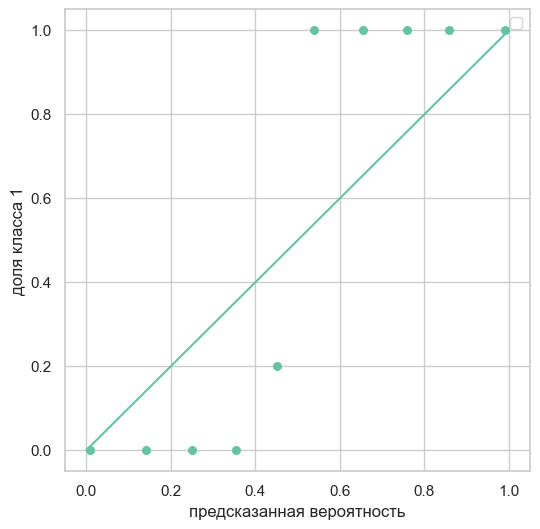

In [ ]:
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();


mod = LogisticRegression(penalty="l2", fit_intercept=True, max_iter = 10000, solver = "lbfgs", C  = 0.1)
mod.fit(X, y)
p_h = mod.predict_proba(X)[:, 1]
bins = np.array([x / 10.0 for x in range(0, 11)])
index = np.digitize(p_h, bins, right=True) - 1
index = np.clip(index, 0, len(bins) - 2)

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean')).reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('предсказанная вероятность')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\3111862182.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


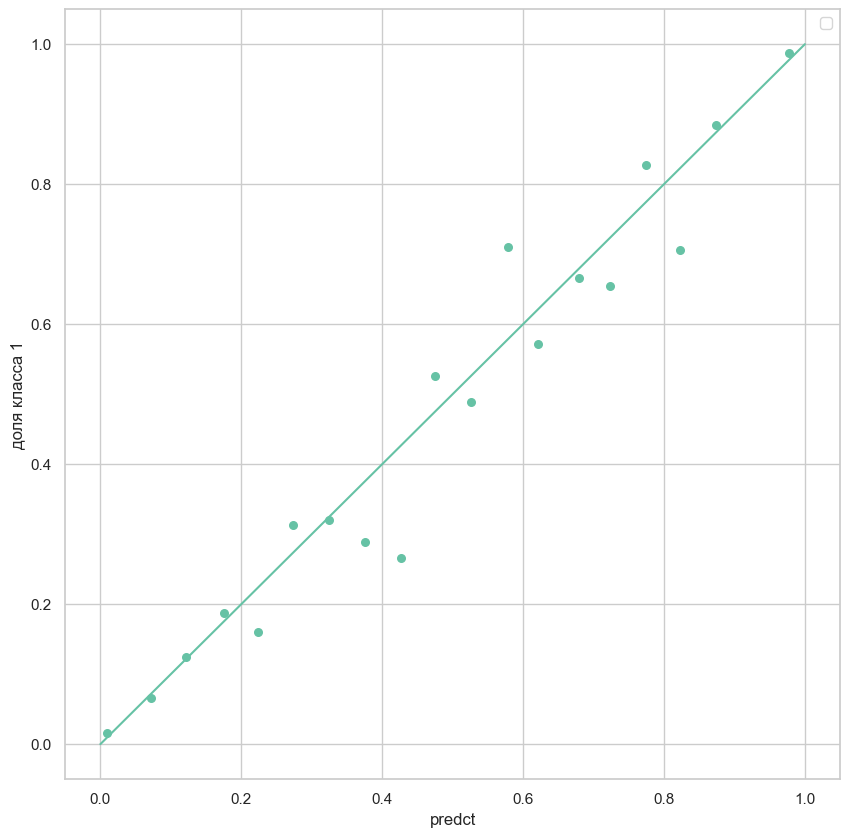

In [9]:

p_h = a.predict_proba(X)[:, 1]
bins = np.array([x / 100.0 for x in range(0, 100, 5)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(p_h, bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean'))



plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('predct')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
#next

In [ ]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10_000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,1,1,0
1,0,1,0
2,1,1,1
3,1,1,1
4,1,1,1


In [ ]:

share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
print(share)

                       target
feature_1 feature_2          
0         0          0.734014
          1          0.697253
1         0          0.524937
          1          0.732491


In [ ]:

y = data['target']
X = data.drop(columns=['target'])

mod = LogisticRegression(penalty =None, fit_intercept=True, max_iter = 10000, solver = "lbfgs")
mod.fit(X, y)

unique = pd.DataFrame([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], columns=['feature_1', 'feature_2'])

p = mod.predict_proba(unique)
print(p)
print(p[:, 1])

#Чтобы было удобно сравнивать, создадим новый DataFrame, в котором будут 
# и реальные частоты (из прошлого задания), и предсказанные моделью вероятности.
share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
share['p'] = p[:, 1]
print(share)

[[0.33660004 0.66339996]
 [0.23040058 0.76959942]
 [0.43799101 0.56200899]
 [0.31499108 0.68500892]]
[0.66339996 0.76959942 0.56200899 0.68500892]
                       target         p
feature_1 feature_2                    
0         0          0.734014  0.663400
          1          0.697253  0.769599
1         0          0.524937  0.562009
          1          0.732491  0.685009
